In [2]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import copy


# Uploading The Dataset

In [3]:
data = pd.read_csv("3phasedata.csv")
data= data.drop('Unnamed: 0',axis= 1)
data

,sensor1,sensor2,sensor3
0,2040,2361,38
1,2031,2365,52
2,2031,2370,53
3,2025,2372,54
4,2023,2379,54
...,...,...,...
3169995,2214,1978,368
3169996,2217,1985,358
3169997,2218,1989,346
3169998,2220,1996,337


In [20]:
# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

In [21]:

# Perform PCA
pca = PCA(n_components=3)
pca.fit(data_std)

# Get the transformed data
data_pca = pca.transform(data_std)


In [22]:
params = {'contamination': [0.1,0.01,0.05]}

clf =  
gcv = GridSearchCV(estimator = clf,param_grid = params)
gcv.fit(X_train,y_train)


dict_keys(['bootstrap', 'contamination', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'random_state', 'verbose', 'warm_start'])

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test=train_test_split(data_std,test_size=0.2)

In [33]:
634000+2536000

3170000

# Training model

In [34]:
from sklearn.ensemble import IsolationForest

# Assuming `X_pca` is your PCA-transformed data matrix
# Instantiate the Isolation Forest model
clf_pca1 = IsolationForest(contamination=0.1, random_state=42)

# Train the model on the transformed data
clf_pca1.fit(x_train)

# Predict the anomalies in the transformed data
y_pred_pca1 = clf_pca1.predict(x_test)


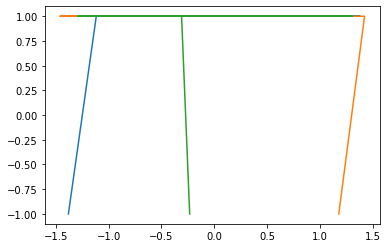

In [44]:
plt.plot(x_test[:15],y_pred_pca1[:15])
plt.show()

#MCSA on data

In [7]:
import numpy as np
from scipy.stats import skew, kurtosis


# calculate the features
pp_amp = np.max(data, axis=1) - np.min(data, axis=1)
rms_amp = np.sqrt(np.mean(data**2, axis=1))
crest_factor = np.max(data, axis=1) / rms_amp
skewness = skew(data, axis=1)
kurtosis_1 = kurtosis(data, axis=1)

# stack all the features together to create your feature matrix
features = np.stack([pp_amp, rms_amp, crest_factor, skewness, kurtosis_1], axis=1)


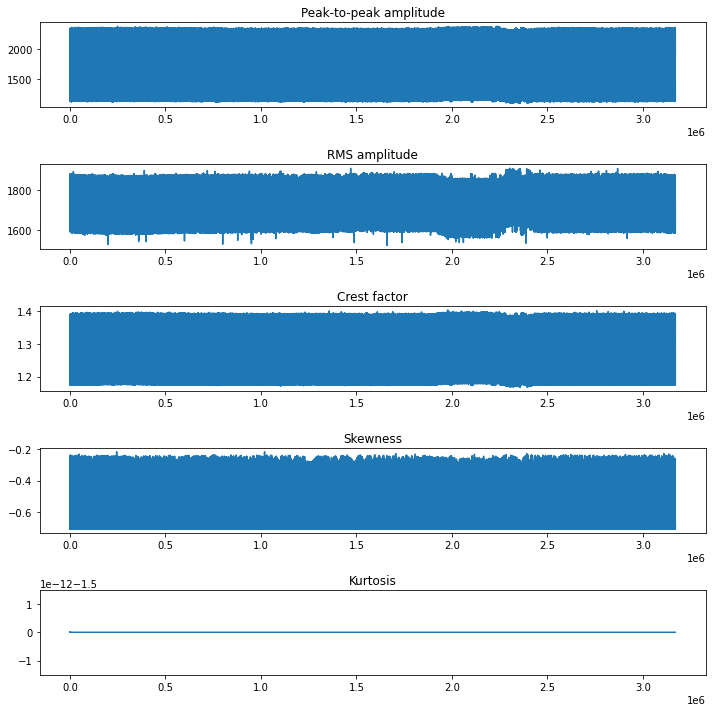

In [8]:
#plotting the fEature
import matplotlib.pyplot as plt

# plot the features
fig, axs = plt.subplots(nrows=5, figsize=(10, 10))
axs[0].plot(pp_amp)
axs[0].set_title('Peak-to-peak amplitude')
axs[1].plot(rms_amp)
axs[1].set_title('RMS amplitude')
axs[2].plot(crest_factor)
axs[2].set_title('Crest factor')
axs[3].plot(skewness)
axs[3].set_title('Skewness')
axs[4].plot(kurtosis_1)
axs[4].set_title('Kurtosis')

plt.tight_layout()
plt.show()


In [9]:
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# apply MCSA on the reduced feature matrix
threshold = 0.9
mcsa = np.zeros((len(features_pca)))
for i in range(len(features_pca)):
    similarity = np.dot(features_pca[i], features_pca.T)
    mcsa[i] = np.sum(similarity >= threshold)

# print the MCSA result
print("MCSA result:", mcsa)

KeyboardInterrupt: 

In [10]:
pp_amp[:100]

0     2323
1     2313
2     2317
3     2318
4     2325
      ... 
95    1790
96    1797
97    1809
98    1817
99    1826
Length: 100, dtype: int64

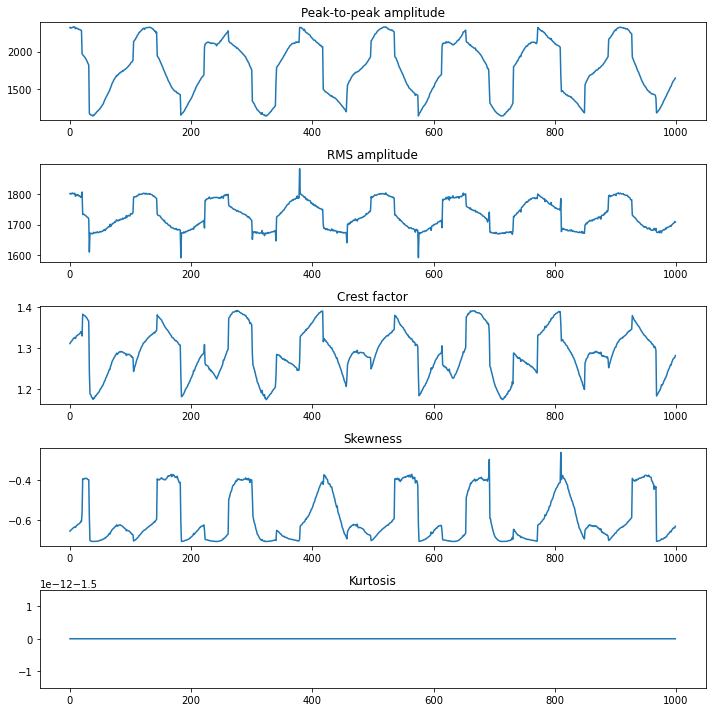

In [12]:
#plotting the fEature
import matplotlib.pyplot as plt

# plot the features
fig, axs = plt.subplots(nrows=5, figsize=(10, 10))
axs[0].plot(pp_amp[:1000])
axs[0].set_title('Peak-to-peak amplitude')
axs[1].plot(rms_amp[:1000])
axs[1].set_title('RMS amplitude')
axs[2].plot(crest_factor[:1000])
axs[2].set_title('Crest factor')
axs[3].plot(skewness[:1000])
axs[3].set_title('Skewness')
axs[4].plot(kurtosis_1[:1000])
axs[4].set_title('Kurtosis')

plt.tight_layout()
plt.show()
